In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.pyplot as plt 
import operator
import collections
import plotly.express as px

In [91]:
df = pd.read_json("data/tweets_0.json", lines = True)

In [154]:
user=[]
arroba=[]
hashtag=[]
place=[]

for i in range(len(df.user)):
    user.append(df.user[i]['screen_name'])
    place.append(df.place[i]['full_name'])
    
    for j in range(len(df.entities[i]['user_mentions'])):
        if  df.entities[i]['user_mentions'][j]['screen_name'] != '':
            arroba.append(df.entities[i]['user_mentions'][j]['screen_name'])
            
    for j in range(len(df.entities[i]['hashtags'])):
        if df.entities[i]['hashtags'][j]['text']!= '':
            hashtag.append(df.entities[i]['hashtags'][j]['text'])
    
    
    #try:
     #   arr = re.findall('@([A-Za-z0-9_]+)', df.text[i])
        #hasht=re.findall('#([A-Za-z0-9_]+)', df.text[i])
        #if arr!=[]:
            #arroba.append(arr)
        #if hasht!=[]:
            #hashtag.append(hasht)
    #except:
        #pass
#arroba = [val.lower() for sublist in arroba for val in sublist]
#hashtag= [val.lower() for sublist in hashtag for val in sublist]
hashtag=[i.lower() for i in hashtag]


In [155]:
def generaLista(user):
    
    lista_users=collections.Counter(user)
    lista_users = sorted(lista_users.items(), key=operator.itemgetter(1), reverse=True)
    usuario, aparicion_usuario= map(list, zip(*lista_users))
    return aparicion_usuario, usuario

def radar(aparicionlist, itemlist, names=['aparicion', 'item']):
    df2 = pd.DataFrame(dict(
        Apariciones=aparicionlist,
        Hashtag_=itemlist))
    df2.columns=names
    fig = px.line_polar(df2, r=names[0],theta=names[1], line_close=True)
    fig.show()

aparicion_hash, hashs = generaLista(hashtag)
aparicion_arroba, arrobas= generaLista(arroba)
aparicion_usuario, usuarios= generaLista(user)
aparicion_place, place= generaLista(place)

<function matplotlib.pyplot.show>

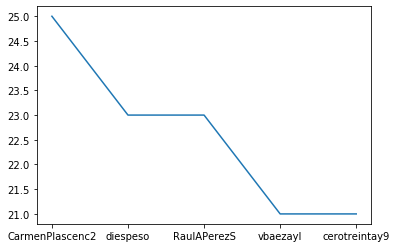

In [124]:
plt.plot(usuarios[:5], aparicion_usuario[:5])
plt.show

<function matplotlib.pyplot.show>

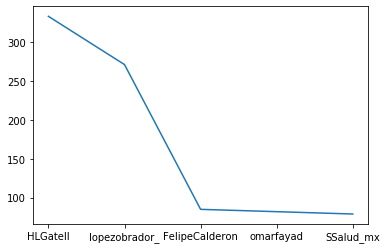

In [125]:
#lista_arroba=collections.Counter(arroba)
#lista_arroba = sorted(lista_arroba.items(), key=operator.itemgetter(1), reverse=True)
#arrobas, aparicion_arroba= map(list, zip(*lista_arroba))
plt.plot(arrobas[:5], aparicion_arroba[:5])
plt.show

<function matplotlib.pyplot.show>

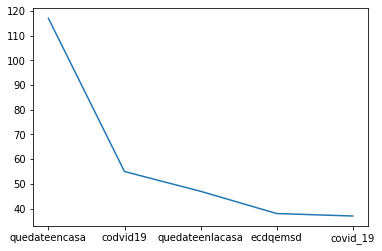

In [126]:
#lista_hash=collections.Counter(hashtag)
#lista_hash = sorted(lista_hash.items(), key=operator.itemgetter(1), reverse=True)
#hashtags, aparicion_hash= map(list, zip(*lista_hash))
plt.plot(hashtags[:5], aparicion_hash[:5])
plt.show

<function matplotlib.pyplot.show>

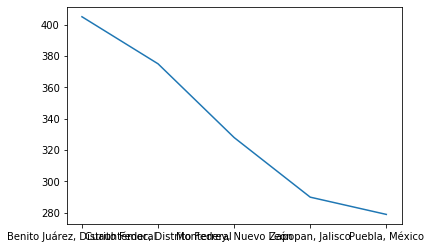

In [156]:
plt.plot(place[:5], aparicion_place[:5])
plt.show

In [141]:
radar(aparicion_hash[:10], hashtags[:10], names=['Apariciones', 'Hashtags'])



In [143]:
radar(aparicion_arroba[:10], arrobas[:10], names=['Apariciones', 'Mencionados'])

In [145]:
radar(aparicion_usuario[:10], usuario[:10], names=['Apariciones', 'Usuario-Activo'])

In [152]:
aparicion, place= generaLista(place)

In [162]:
radar(aparicion[:9], place[:9], names=['Cantidad','Región'])